In [1]:
# This code is written to support the experiments in the book titled:
# "Adaptive Machine Learning Algorithms with Python"
# by
# Chanchal Chatterjee
# December 2021
#
# Experiments for Chapter 1 (e-shop-clothing-2008.csv Data)
# Hetero-associative example
#
# Author: Chanchal Chatterjee
#

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf


In [3]:
# Data obtained from UCI clickstream dataset for online shopping 
# https://archive.ics.uci.edu/ml/datasets/clickstream+data+for+online+shopping
# Load data into your unique bucket. 
# Here AdaptiveMLAlgorithms/Data/e-shop-clothing-2008.csv

In [4]:
dataset = pd.read_csv("../Data/e-shop-clothing-2008.csv")
dataset = dataset.dropna()
dataset = dataset.drop(['year','month','day','sessionID','clothing_model'], 1)
print(dataset.shape)
print(dataset.head())


(165474, 9)
   order  country  main_category  colour  location  model photography  price  \
0      1       29              1       1         5                  1     28   
1      2       29              1       1         6                  1     33   
2      3       29              2      10         2                  1     52   
3      4       29              2       6         6                  2     38   
4      5       29              2       4         3                  2     52   

   price2  page  
0       2     1  
1       2     1  
2       1     1  
3       2     1  
4       1     1  


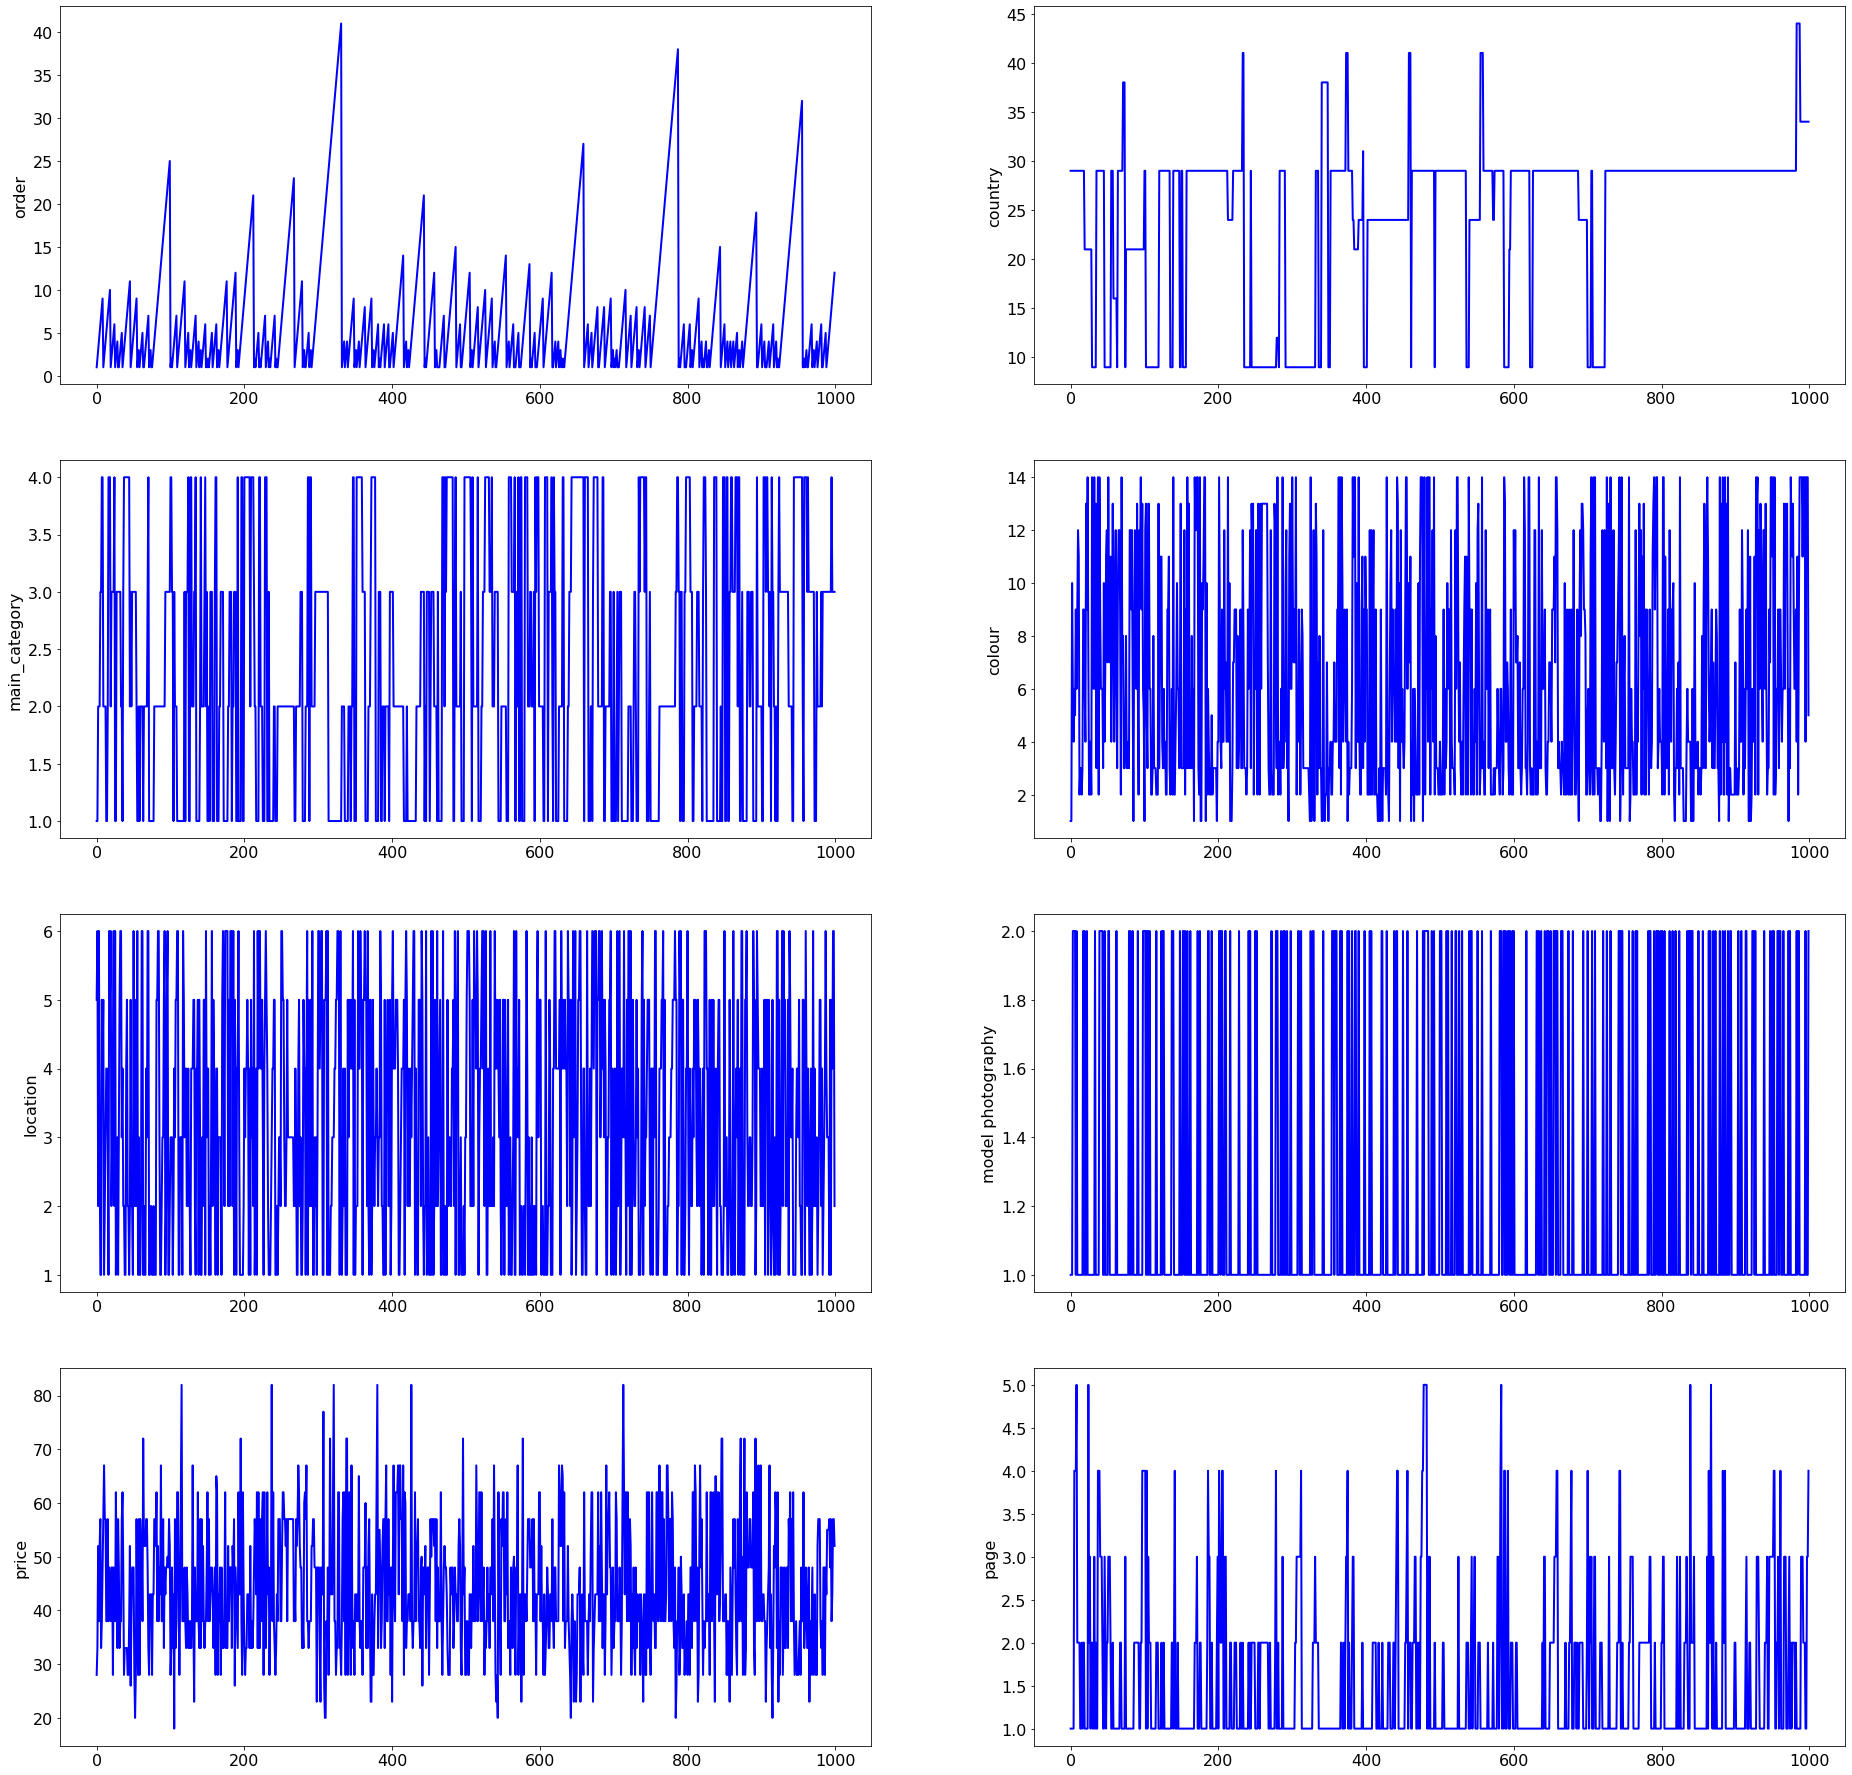

In [5]:
dataset1 = dataset.drop(['price2'], 1)
plt.figure(figsize=(32, 32))
plt.rcParams.update({'font.size': 16})
cols = dataset1.columns
for i in range(dataset1.shape[1]):
    plt.subplot(4, 2, i+1)
    plt.ylabel(cols[i])
    plt.plot(dataset1[cols[i]].iloc[0:1000], lw=2, color='b')
plt.show()


In [6]:
# Compute A and B
from numpy import linalg as la

nSamples = dataset1.shape[0]
nDim = dataset1.shape[1]

classes = np.array(dataset['price2']-1)
classes_categorical = tf.keras.utils.to_categorical(classes, num_classes=2)

M = np.zeros(shape=(nDim,2)) # stores adaptive correlation matrix
B = np.zeros(shape=(nDim,nDim)) # stores adaptive correlation matrix
for iter in range(nSamples):
    cnt = iter + 1
    x = np.array(dataset1.iloc[iter])
    x = x.reshape(nDim,1)
    B = B + (1.0/cnt)*((np.dot(x, x.T)) - B)
    y = classes_categorical[iter].reshape(2,1)
    M = M + (1.0/cnt)*((np.dot(x, y.T)) - M)
    A = M @ M.T


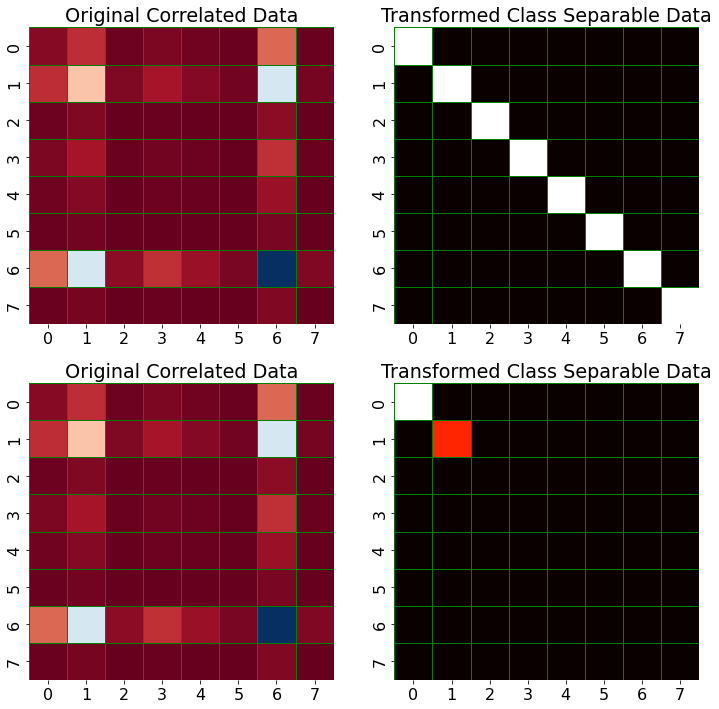

In [7]:
# generate and plot the LDA transformed data
import seaborn as sns
from scipy.linalg import eigh
from sklearn.preprocessing import normalize

eigvals, eigvecs = eigh(A, B)
V = np.fliplr(eigvecs)
D  = np.diag(np.sqrt(eigvals[::-1]))
VTAV = np.around(V.T @ A @ V, 2)
VTBV = np.around(V.T @ B @ V, 2)
# print("VTBV=\n", VTBV)
# print("VTAV=\n", VTAV)

plt.figure(figsize=(12, 12))
plt.rcParams.update({'font.size': 16})

plt.subplot(2, 2, 1)
sns.heatmap(A, linewidth=0.5, linecolor="green", cmap='RdBu', cbar=False)
plt.title("Original Correlated Data")

plt.subplot(2, 2, 2)
sns.heatmap(VTBV, linewidth=0.5, linecolor="green", cmap='hot', cbar=False)
plt.title("Transformed Class Separable Data")

plt.subplot(2, 2, 3)
sns.heatmap(A, linewidth=0.5, linecolor="green", cmap='RdBu', cbar=False)
plt.title("Original Correlated Data")

plt.subplot(2, 2, 4)
sns.heatmap(VTAV, linewidth=0.5, linecolor="green", cmap='hot', cbar=False)
plt.title("Transformed Class Separable Data")

plt.show()
